In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde import KDE
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import normal_reference, direct_plugin

Przy

a=0.00, 0.01, 0.02, 0.03, ... , 0.3

oraz

r=0.01, 0.02, 0.03, ... , 0.2

Wskaźnik taki sam jak w ujęciu bezwarunkowym:

$$PI_{KF} = \frac{\sum_{i=1}^{m_{out}} \hat{f}(x_i^{out})}{\sum_{i=1}^{m_{out}} \hat{f}(x_i^{in})}$$

W liczniku biorą udział wszystkie elementy nietypowe, natomiast w mianowniku tylko $m_{out}$ elementów typowych o najmniejszych wartościach estymatora gęstości.

In [2]:
def func(x_train):
    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth)
    scores = kde.pdf(x_train)

    metrics_list = [0., 0.]
    r_list = [-0.01, 0.]
    for r in np.arange(0.01, 0.23, 0.01):
        r = round(r, 3)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        scores_o = scores[labels_pred==1]
        scores_i = scores[labels_pred==0]
        metrics = np.sum(scores_o) / np.sum(np.sort(scores_i)[:n_outliers])

        metrics_list.append(metrics)
        r_list.append(r)
        
    plt.figure(figsize=(6, 4))
    plt.plot(r_list, metrics_list, "-o")
    plt.xlabel("r")
    plt.ylabel("PI")
    plt.grid()
    plt.show()

    # Find minima
#     idx = np.argmin(metrics_list)
#     global_min = (metrics_list[idx], r_list[idx])
    values = []
    for i in range(2, 22):
#         values.append(metrics_list[i+1] - 2*metrics_list[i] + metrics_list[i-1])
        values.append((metrics_list[i+2] + metrics_list[i+1] - 2*metrics_list[i]) - (2*metrics_list[i] - metrics_list[i-1]- metrics_list[i-2]))
    best_idx = np.argmax(values) + 2
    global_min = (metrics_list[best_idx], r_list[best_idx])
    
#     print(f"r - globalne minimum: {global_min[1]:.3f}")
    print(f"r - globalne minimum: {r_list[best_idx]:.3f}")
    print("-"*10)
    
    return global_min, scores

\newpage

a = 0.0


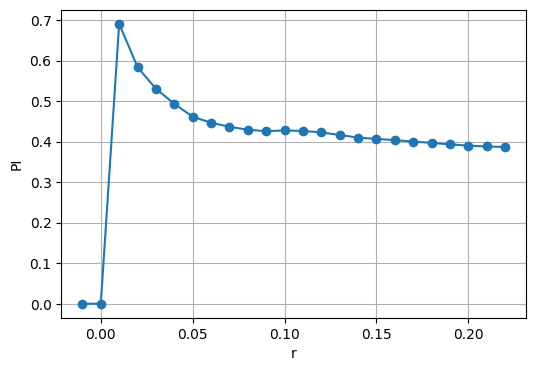

r - globalne minimum: 0.030
----------


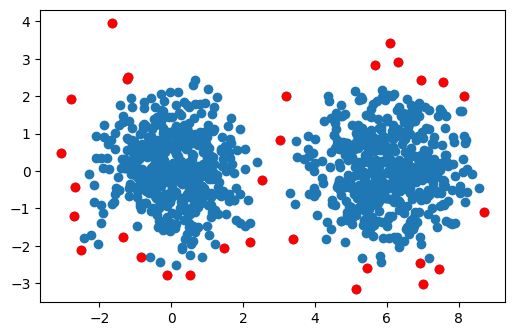

a = 0.01


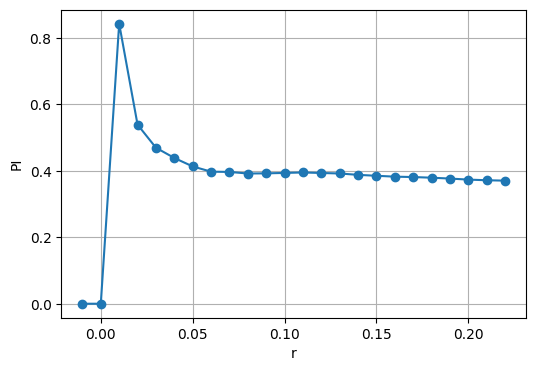

r - globalne minimum: 0.030
----------


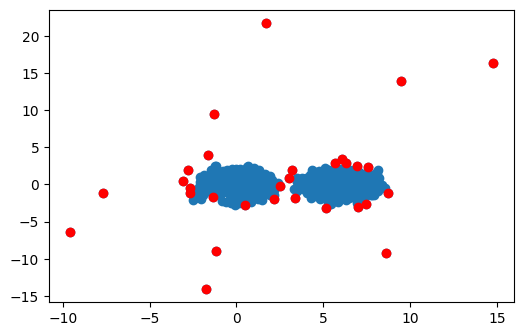

a = 0.02


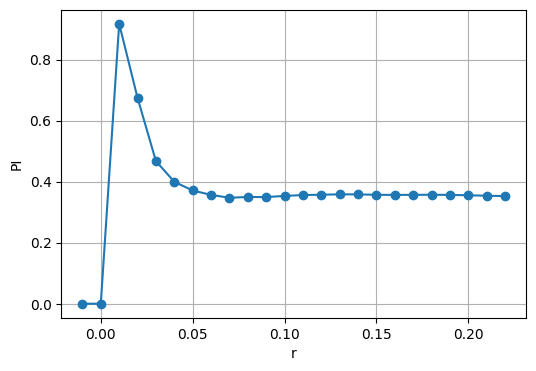

r - globalne minimum: 0.030
----------


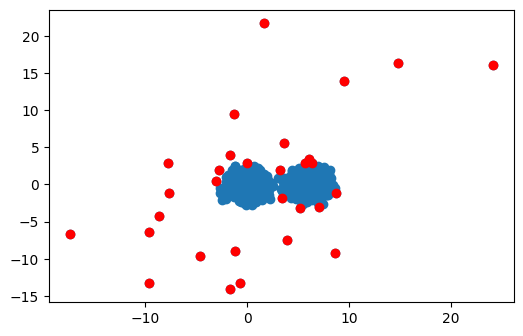

a = 0.03


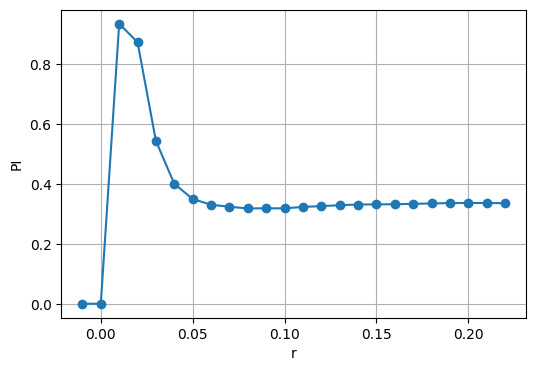

r - globalne minimum: 0.040
----------


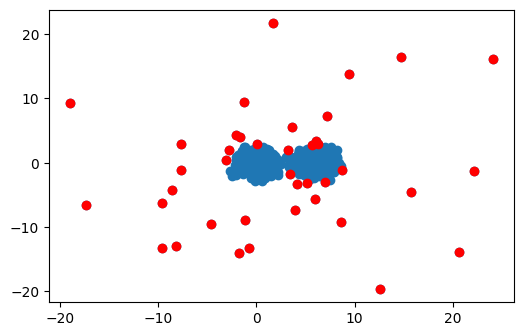

a = 0.04


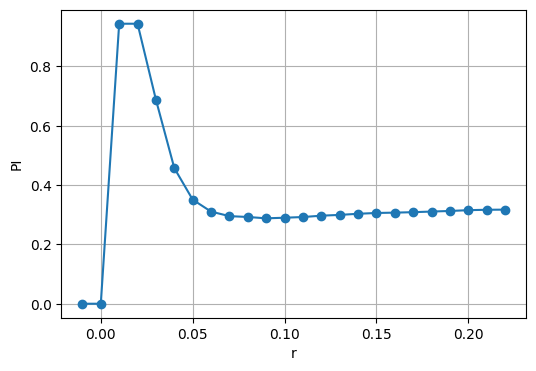

r - globalne minimum: 0.040
----------


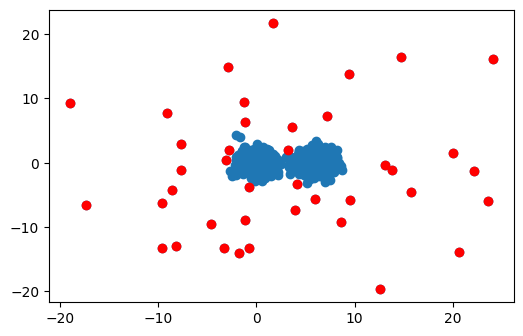

a = 0.05


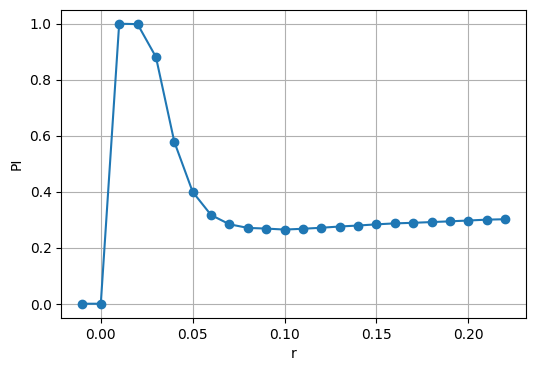

r - globalne minimum: 0.050
----------


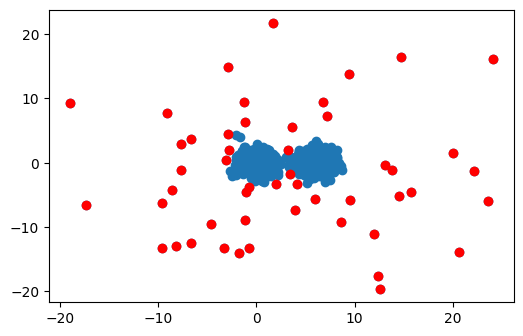

a = 0.06


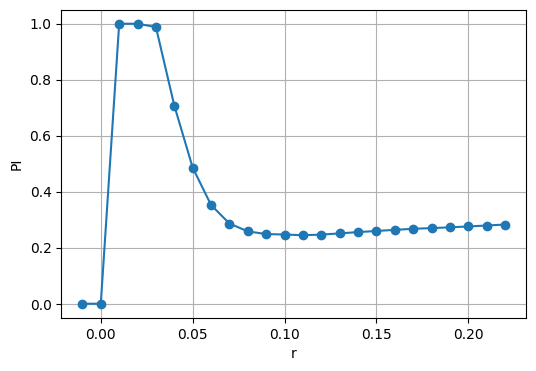

r - globalne minimum: 0.050
----------


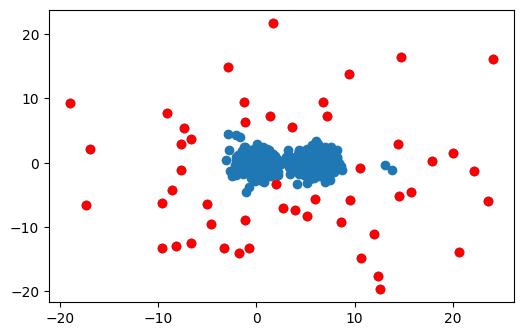

a = 0.07


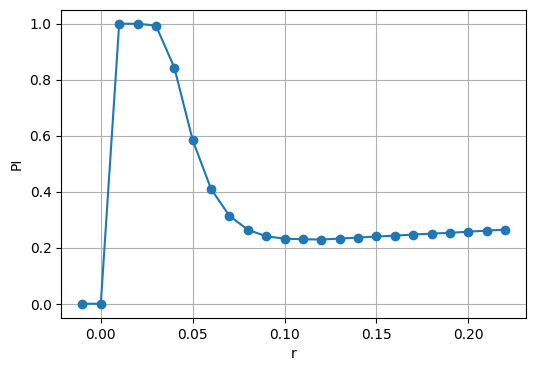

r - globalne minimum: 0.060
----------


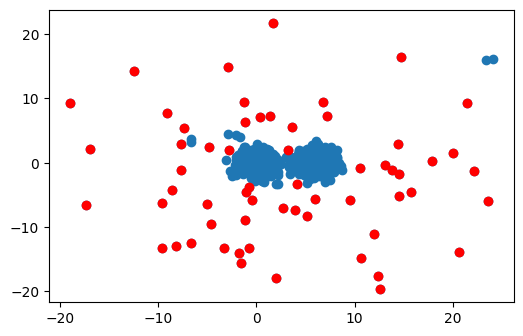

a = 0.08


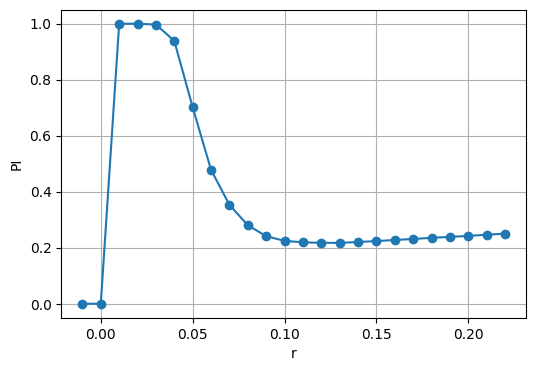

r - globalne minimum: 0.060
----------


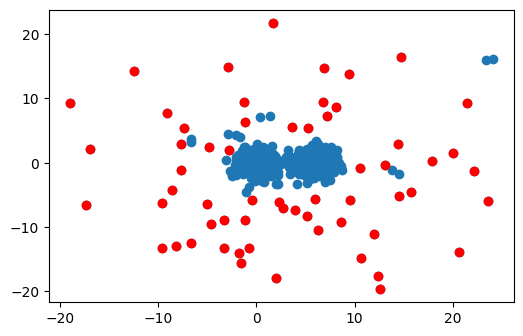

a = 0.09


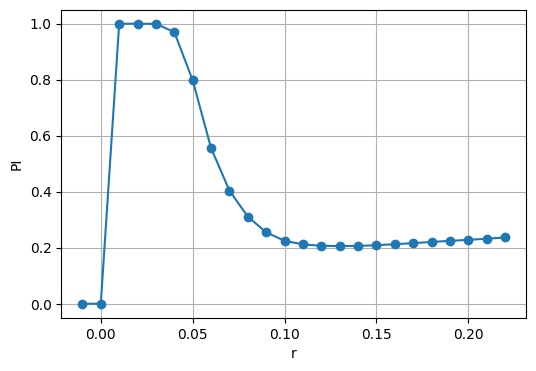

r - globalne minimum: 0.070
----------


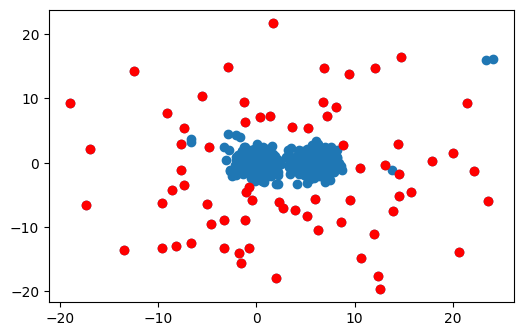

a = 0.1


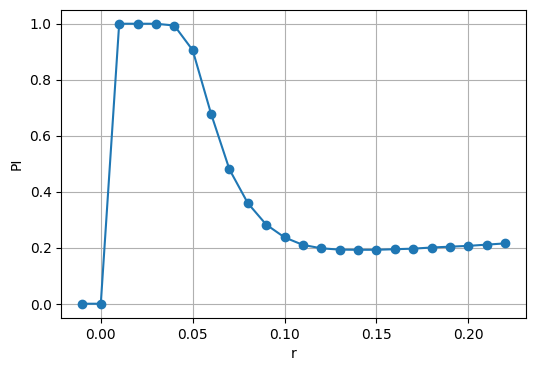

r - globalne minimum: 0.070
----------


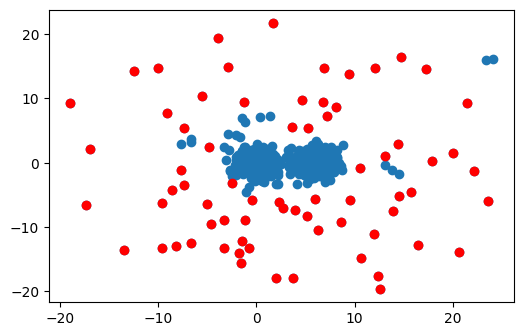

a = 0.11


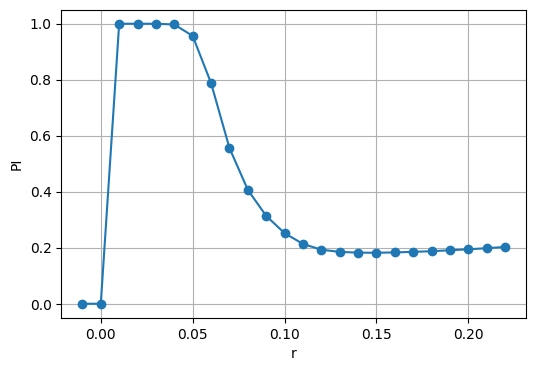

r - globalne minimum: 0.080
----------


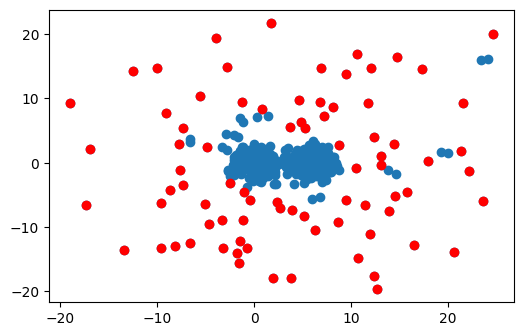

a = 0.12


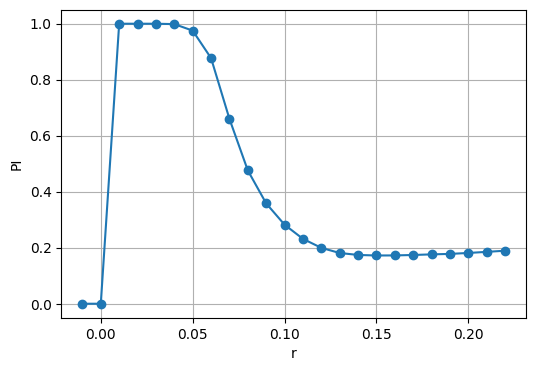

r - globalne minimum: 0.080
----------


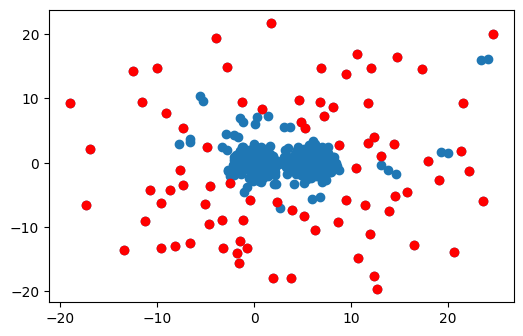

a = 0.13


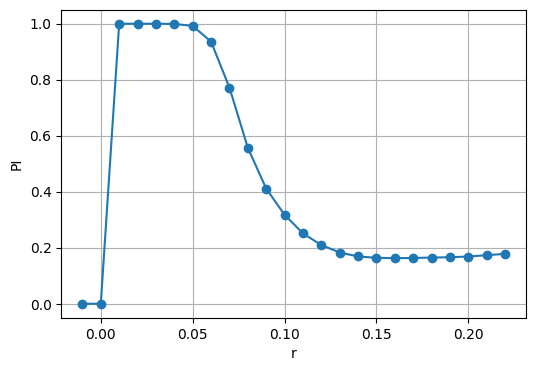

r - globalne minimum: 0.090
----------


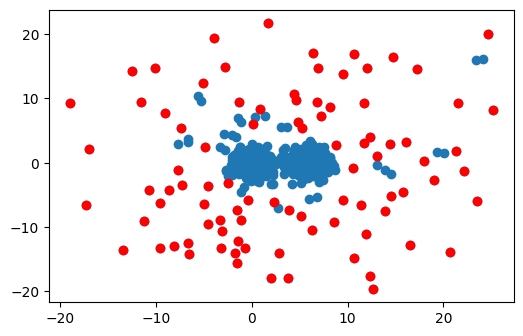

a = 0.14


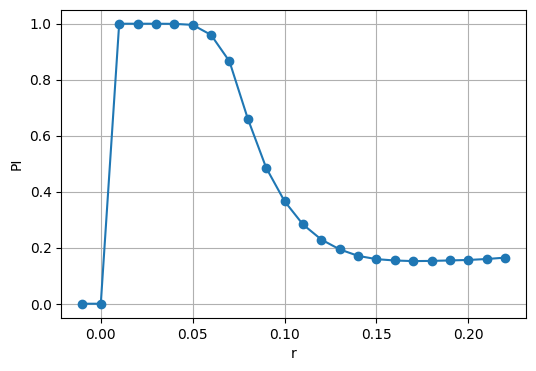

r - globalne minimum: 0.090
----------


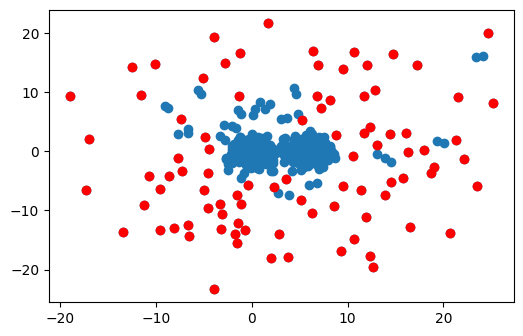

a = 0.15


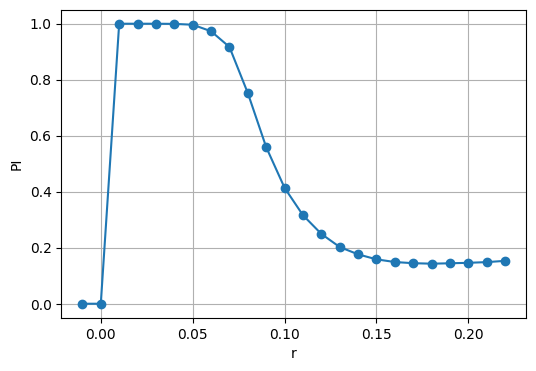

r - globalne minimum: 0.100
----------


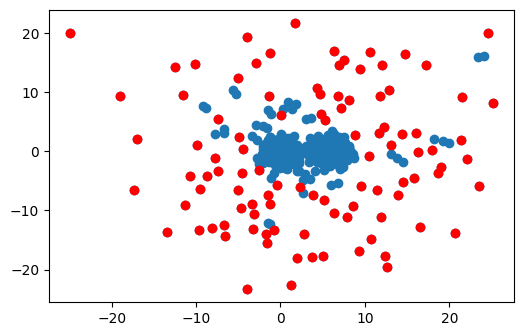

a = 0.16


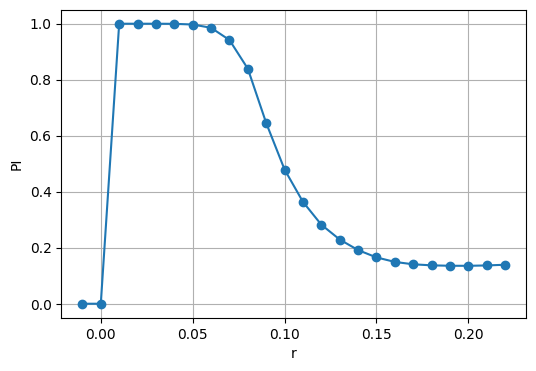

r - globalne minimum: 0.100
----------


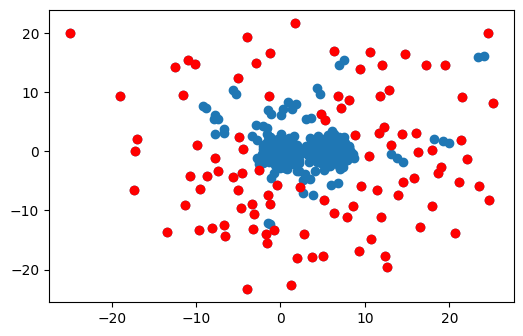

a = 0.17


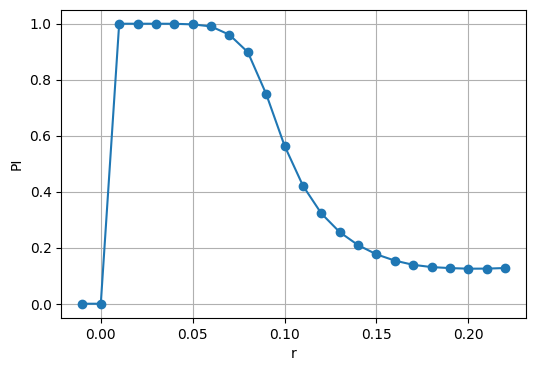

r - globalne minimum: 0.110
----------


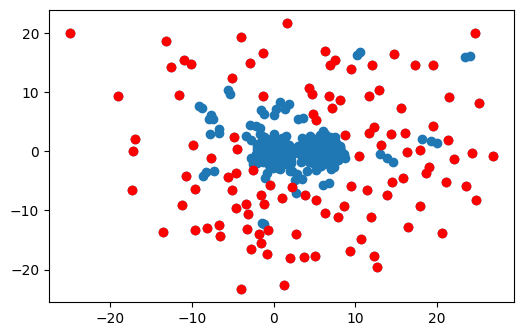

a = 0.18


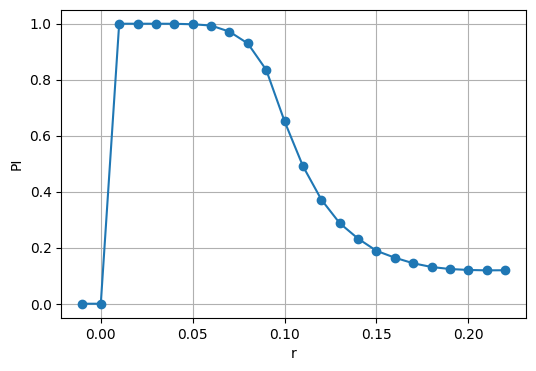

r - globalne minimum: 0.110
----------


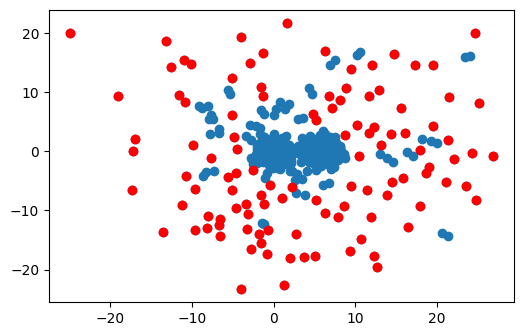

a = 0.19


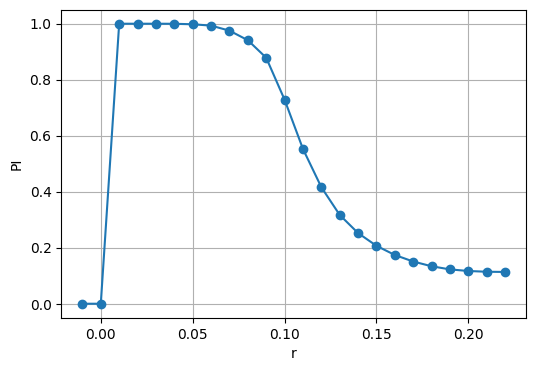

r - globalne minimum: 0.120
----------


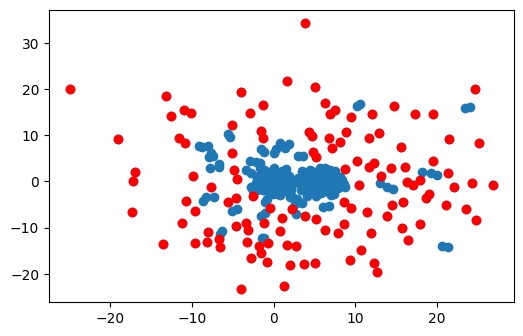

a = 0.2


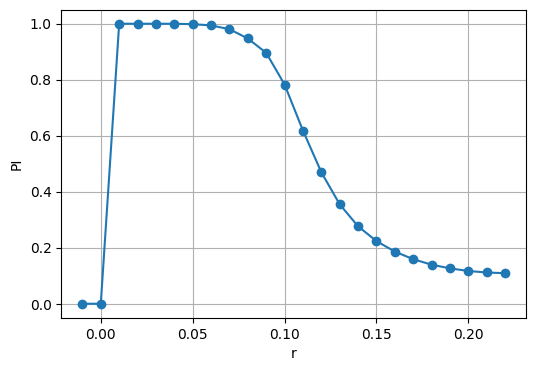

r - globalne minimum: 0.130
----------


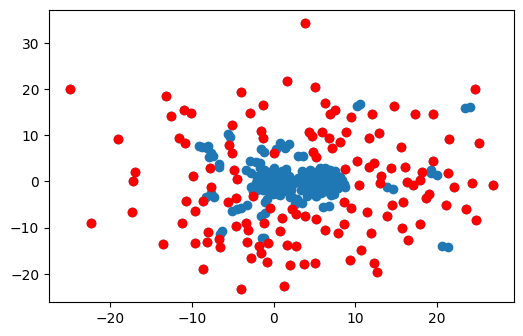

a = 0.21


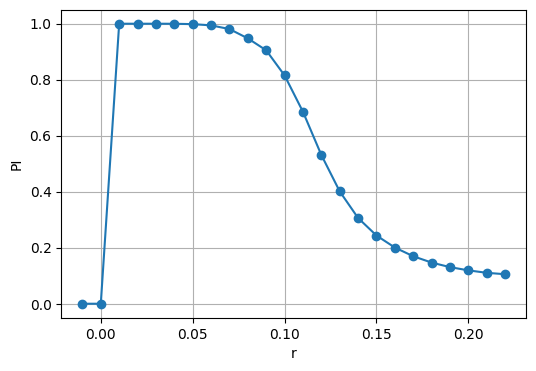

r - globalne minimum: 0.130
----------


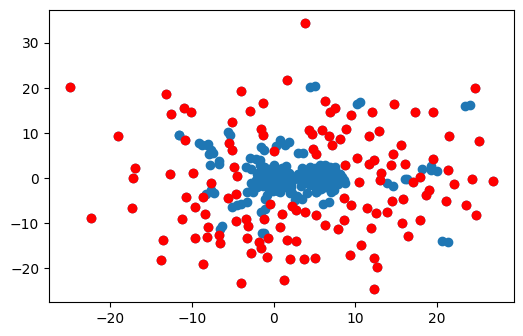

a = 0.22


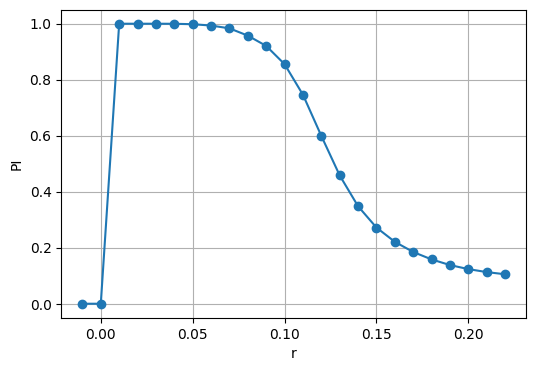

r - globalne minimum: 0.140
----------


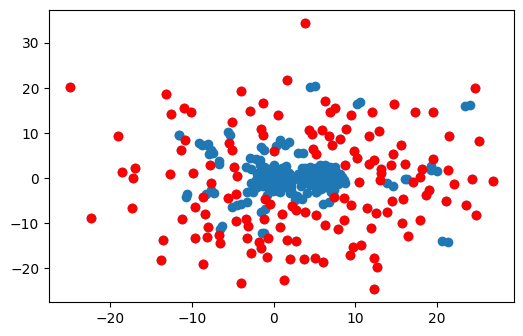

a = 0.23


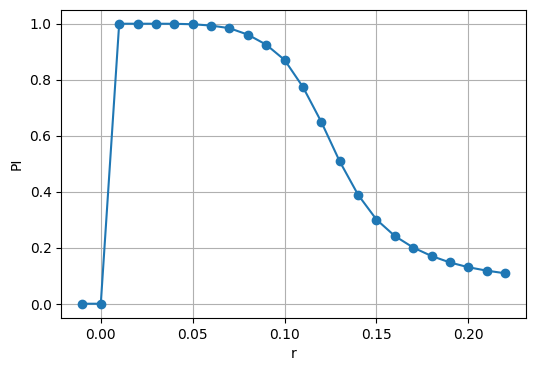

r - globalne minimum: 0.140
----------


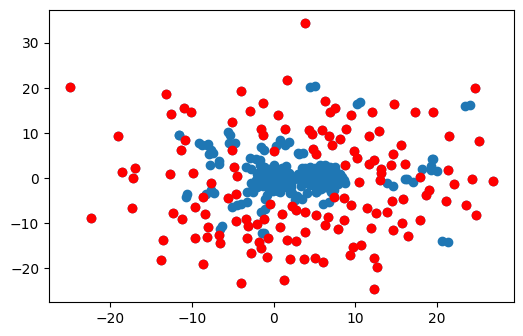

a = 0.24


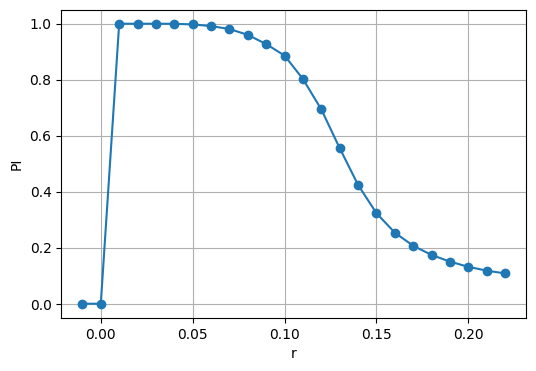

r - globalne minimum: 0.150
----------


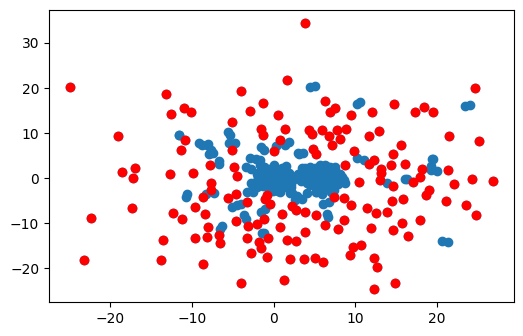

a = 0.25


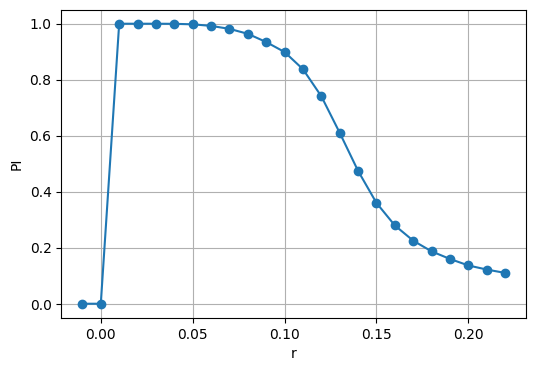

r - globalne minimum: 0.150
----------


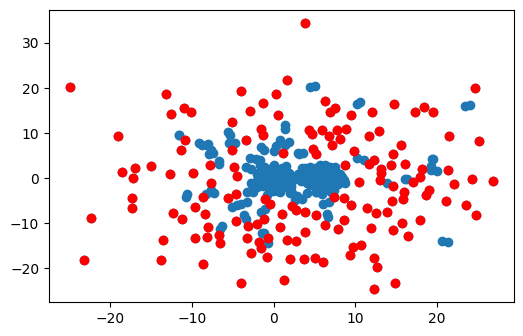

a = 0.26


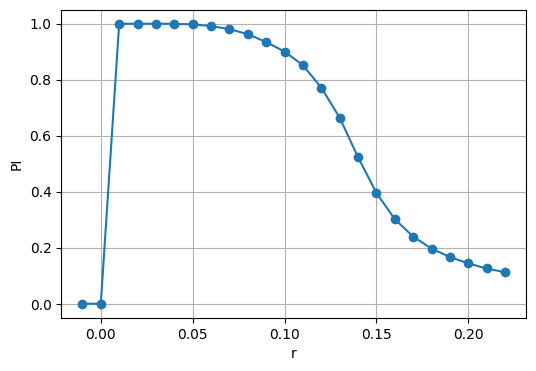

r - globalne minimum: 0.160
----------


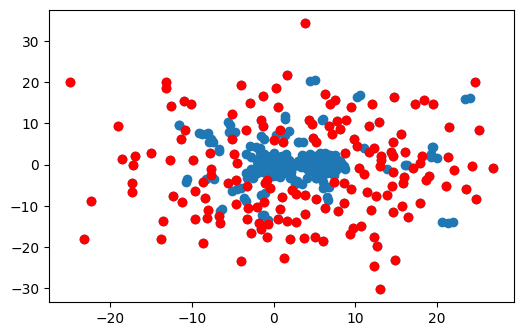

a = 0.27


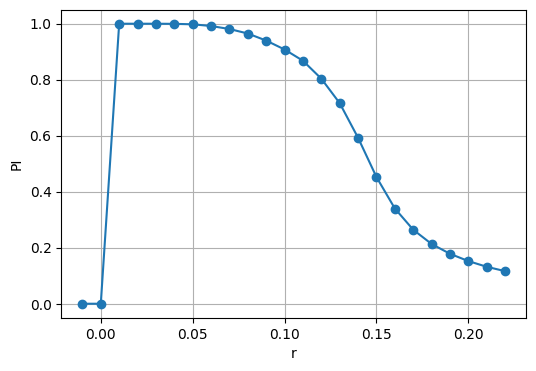

r - globalne minimum: 0.160
----------


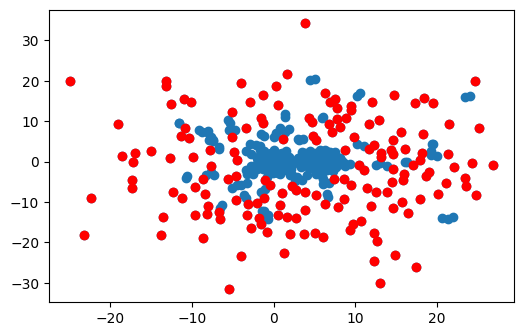

a = 0.28


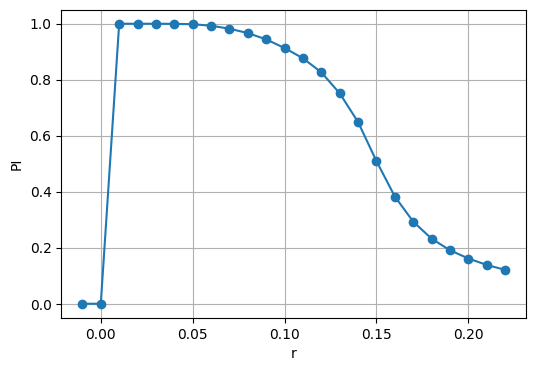

r - globalne minimum: 0.160
----------


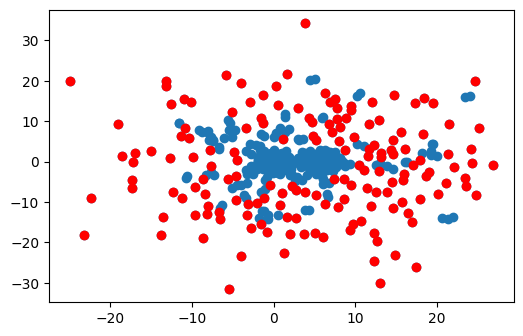

a = 0.29


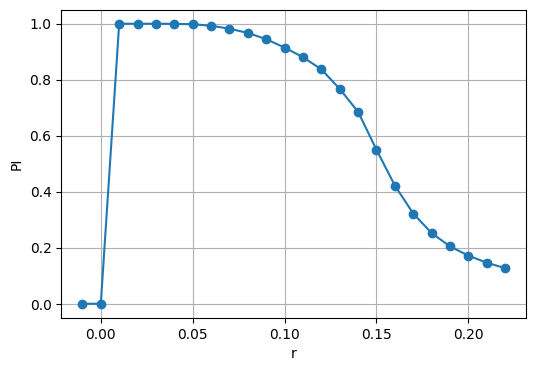

r - globalne minimum: 0.170
----------


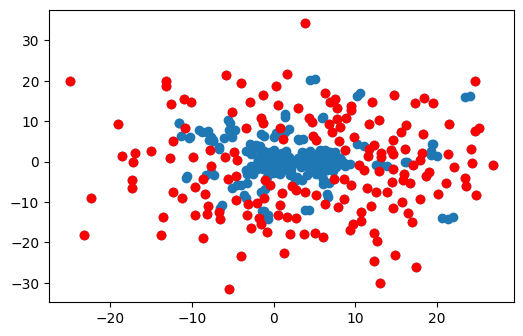

a = 0.3


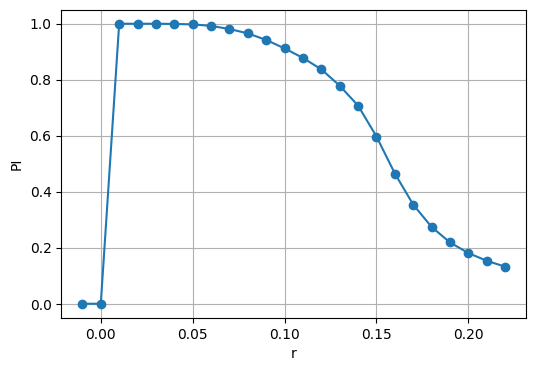

r - globalne minimum: 0.170
----------


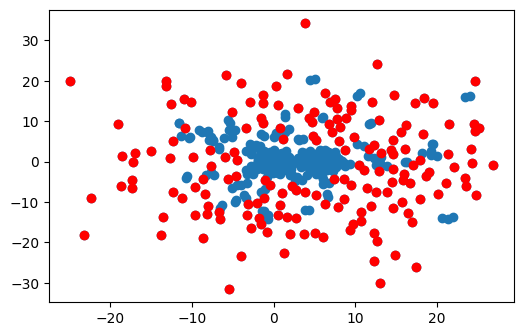

In [3]:
for a in np.arange(0.0, 0.31, 0.01):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))
    
    # Run
    global_min, scores = func(x_train)
    
    plt.figure(figsize=(6, 3.8))
    threshold = np.quantile(scores, global_min[1])
    labels_pred = np.where(scores <= threshold, 1, 0)
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
#     plt.xlim(-4, 10)
#     plt.ylim(-4, 4)
    plt.show()